In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict
from summarizer import Summarizer
import matplotlib.pyplot as plt
from plot_features import plot_confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
attacks = ['ddos', 'spam', 'irc']
files = ['minute_aggregated/{}_background-0.1s.featureset.csv'.format(attack) for attack in attacks]

Using TensorFlow backend.


## Deep Learning With Normalized Features

for deep learning
minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.8919, Recall: 0.9479, Precision: 0.8310, f1_score: 0.8856 



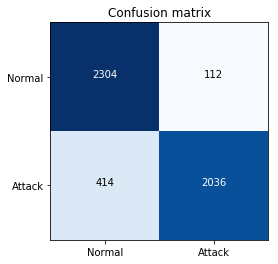

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.8605, Recall: 0.8031, Precision: 0.9566, f1_score: 0.8731 



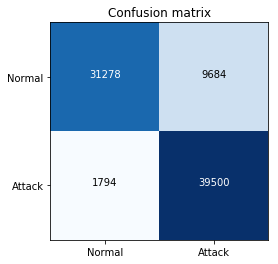

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.8459, Recall: 0.8118, Precision: 0.9020, f1_score: 0.8545 



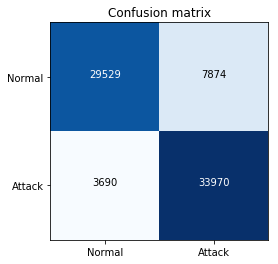

ddos 0.8919 - 0.8310 - 0.9479 - 0.8856
spam 0.8605 - 0.9566 - 0.8031 - 0.8731
irc 0.8459 - 0.9020 - 0.8118 - 0.8545


In [4]:
print('for deep learning')
other_files = ['minute_aggregated/ddos_background_new-0.1s.featureset.csv'] + files[1:]
scores = []
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True,
                                                              norm_and_standardize=True)
    clf = dl_train(xtrain, ytrain, use_big_model=True, use_class_weight=False)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

    
for i, score in enumerate(scores):
    print(attacks[i], score)

## Random Forest Initial Results

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.9905, Recall: 0.9576, Precision: 0.6564, f1_score: 0.7789 



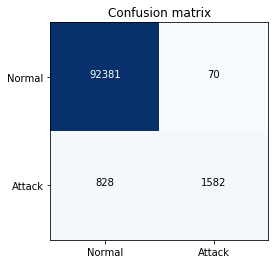

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.9598, Recall: 0.7900, Precision: 0.4921, f1_score: 0.6064 



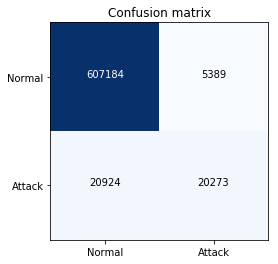

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.9584, Recall: 0.7884, Precision: 0.3704, f1_score: 0.5040 



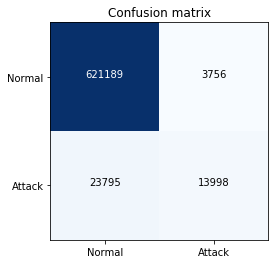

ddos 0.9905 - 0.6564 - 0.9576 - 0.7789
spam 0.9598 - 0.4921 - 0.7900 - 0.6064
irc 0.9584 - 0.3704 - 0.7884 - 0.5040


In [5]:
# Detecting Attacks

scores = []

for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=False)
    clf = rf_train(xtrain, ytrain, trees=10)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

for i, score in enumerate(scores):
    print(attacks[i], score)

## Deep Learning initial results

for deep learning
minute_aggregated/spam_background-0.1s.featureset.csv


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.9370, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



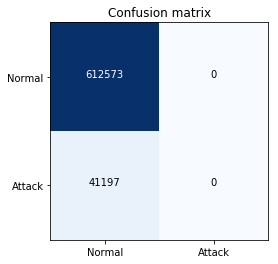

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.9746, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



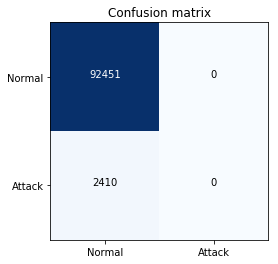

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.9430, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



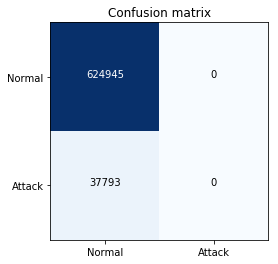

spam 0.9370 - 0.0000 - 0.0000 - 0.0000
ddos 0.9746 - 0.0000 - 0.0000 - 0.0000
irc 0.9430 - 0.0000 - 0.0000 - 0.0000


In [10]:
print('for deep learning')
scores = []
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=False)
    clf = dl_train(xtrain, ytrain, use_big_model=False, use_class_weight=False)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

for i, score in enumerate(scores):
    print(attacks[i], score)

## Deep Learning with big model

for deep learning
minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.9746, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


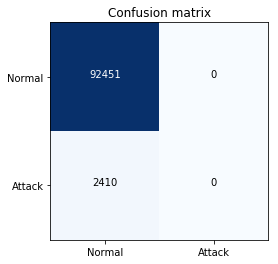

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.9371, Recall: 0.7791, Precision: 0.0033, f1_score: 0.0065 



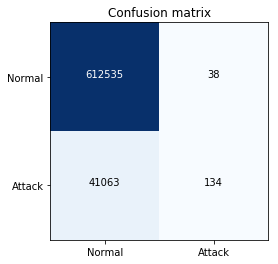

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.9430, Recall: 0.0000, Precision: 0.0000, f1_score: 0.0000 



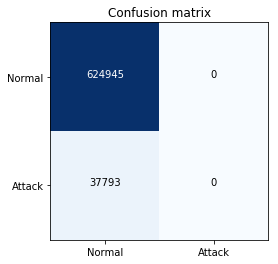

ddos 0.9746 - 0.0000 - 0.0000 - 0.0000
spam 0.9371 - 0.0033 - 0.7791 - 0.0065
irc 0.9430 - 0.0000 - 0.0000 - 0.0000


In [3]:
print('for deep learning')
scores = []
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=False)
    clf = dl_train(xtrain, ytrain, use_big_model=True, use_class_weight=True)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

for i, score in enumerate(scores):
    print(attacks[i], score)

## Random Forest with sampling

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.8964, Recall: 0.9336, Precision: 0.8551, f1_score: 0.8926 



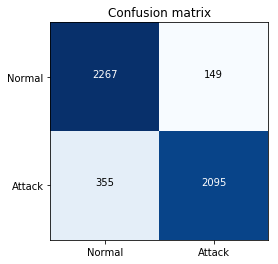

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.9020, Recall: 0.8932, Precision: 0.9140, f1_score: 0.9035 



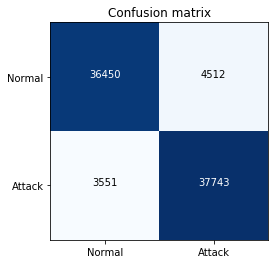

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.8660, Recall: 0.8577, Precision: 0.8788, f1_score: 0.8681 



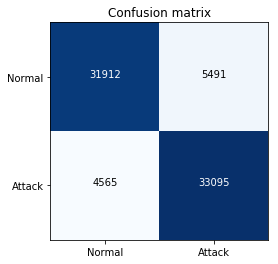

ddos 0.8964 - 0.8551 - 0.9336 - 0.8926
spam 0.9020 - 0.9140 - 0.8932 - 0.9035
irc 0.8660 - 0.8788 - 0.8577 - 0.8681


In [3]:

scores = []

for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = rf_train(xtrain, ytrain, trees=10)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    scores.append('{accuracy:.4f} - {precision:.4f} - {recall:.4f} - {f1_score:.4f}'.format(**results))
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()

for i, score in enumerate(scores):
    print(attacks[i], score)

minute_aggregated/ddos_background-0.1s.featureset.csv


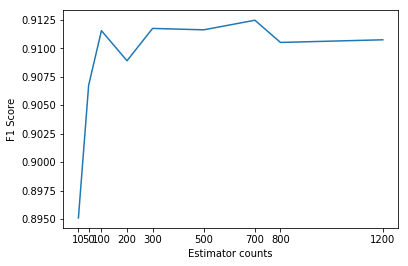

minute_aggregated/spam_background-0.1s.featureset.csv


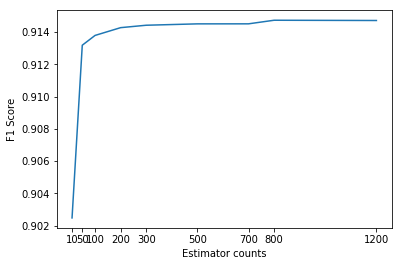

minute_aggregated/irc_background-0.1s.featureset.csv


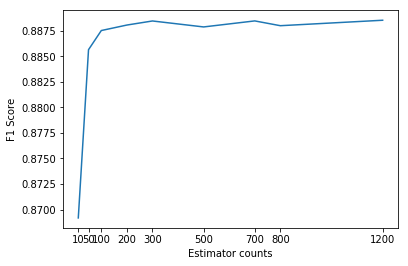

In [4]:
from botnet_detection import rf_compare_estimator_counts
from plot_features import plot_rf_estimators

estimators = [10, 50, 100, 200, 300, 500, 700, 800, 1200]

for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, sample=True)
    scores = rf_compare_estimator_counts(xtrain, xtest, ytrain, ytest, estimators)
    results = test_dict(clf, xtest, ytest)
    plot_rf_estimators(scores, estimators)

In [5]:
for f in files:
    print(f)
    
    kf = KFold(n_splits=10)
    accuracy, precision, recall, f1_score = [], [], [], []
    features, labels = get_specific_features_from(f, Summarizer().features, sample=True, shuffle=False)
    
    for train, test in kf.split(features):
        xtrain, xtest = features[train], features[test]
        ytrain, ytest = labels[train], labels[test]
        
        clf = rf_train(xtrain, ytrain, trees=300)
        results = test_dict(clf, xtest, ytest)
        
        accuracy.append(results['accuracy'])
        precision.append(results['precision'])
        recall.append(results['recall'])
        f1_score.append(results['f1_score'])
    
    print('Mean Scores: Accuracy - {:.4f} +/- {:.4f}, Precision - {:.4f} +/- {:.4f}, Recall - {:.4f} +/- {:.4f}, f1_score - {:.4f} +/- {:.4f}'.format(
        np.mean(accuracy), np.std(accuracy), np.mean(recall), np.std(recall), np.mean(precision), np.std(precision), np.mean(f1_score), np.std(f1_score)))
          
    print()


minute_aggregated/ddos_background-0.1s.featureset.csv


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true s

Mean Scores: Accuracy - 0.8670 +/- 0.2062, Precision - 0.5000 +/- 0.5000, Recall - 0.4065 +/- 0.4526, f1_score - 0.4306 +/- 0.4603

minute_aggregated/spam_background-0.1s.featureset.csv


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true s

Mean Scores: Accuracy - 0.8562 +/- 0.0750, Precision - 0.5000 +/- 0.5000, Recall - 0.4749 +/- 0.4076, f1_score - 0.4576 +/- 0.4599

minute_aggregated/irc_background-0.1s.featureset.csv


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true s

Mean Scores: Accuracy - 0.7848 +/- 0.0921, Precision - 0.5000 +/- 0.5000, Recall - 0.3765 +/- 0.3863, f1_score - 0.4267 +/- 0.4308



## Deep Learning on background with sampling and class weights.

for deep learning
minute_aggregated/all_background-0.1s.featureset.csv
Accuracy: 0.6116, Recall: 0.5636, Precision: 0.9853, f1_score: 0.7171 



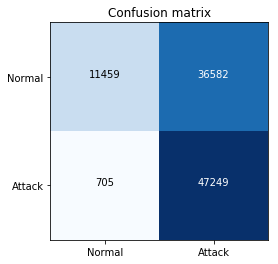

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.6660, Recall: 0.6041, Precision: 0.9711, f1_score: 0.7448 



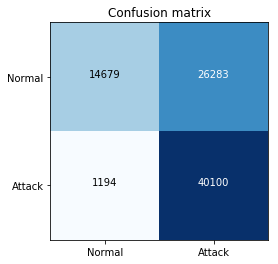

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.7497, Recall: 0.6867, Precision: 0.9249, f1_score: 0.7882 



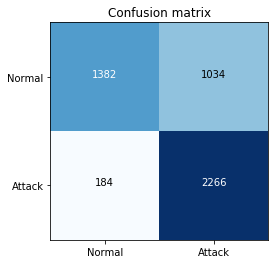

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.7893, Recall: 0.7397, Precision: 0.8949, f1_score: 0.8100 



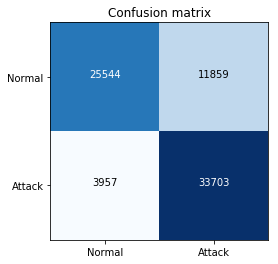

In [11]:
print('for deep learning')
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = dl_train(xtrain, ytrain, use_big_model=True, use_class_weight=True)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    plt.show()